**프로젝트 요구사항**

- `웹 크롤링`
    - requests 패키지를 사용하여 웹 서버에 GET 요청을 보내고, 응답 객체를 해석할 수 있다.
    - BeautifulSoup 함수를 활용하여 웹 문서를 구성 요소(element)를 탐색하고 필요한 값을 추출한다.
    - find 메소드와 find_all 메소드를 구분하여 적용할 수 있다.
    - 태그 이름과 태그를 구성하는 속성 정보를 이용할 수 있다.
    - 문자열 포매팅을 활용하여 추출하려는 웹 페이지의 URL을 조합할 수 있다.
- `한국어 형태소 분석`
    - 인터넷에서 네이버 영화 리뷰 데이터셋을 찾아서, 판다스 데이터프레임으로 변환하여 준비한다.
    - 한국어 형태소 분석기를 지원하는 KoNLPy를 설치하고 활용할 수 있다.
    - 문장을 단어 단위로 분할하고, 분할된 단어들을 다시 문장으로 결합할 수 있다.
    - 문장을 벡터로 표현하는 TF-IDF 벡터화 기법을 이해하고 적용할 수 있다. (sklearn 패키지의 TfidfVectorizer 활용)
- `머신러닝 활용`
    - LDA (LatentDirichletAllocation) 기법을 적용하여 토픽 모델링을 처리해 보고, 결과를 해석할 수 있다.
    - pyLDAvis 시각화 라이브러리를 설치하고,  LDA 토픽 모델링 결과를 해석할 수 있다.
    - 머신러닝 분류 알고리즘인 로지스틱 회귀(Logistic Regression)를 적용하여, 리뷰의 긍정 또는 부정 감성을 예측할 수 있다.
    - 웹 크롤링을 통해서 수집한 네이버 영화 리뷰 텍스트를 분류 모델에 입력하여 긍정인지 부정인지 감성을 분류할 수 있다.

## part 1. 네이버 영화 리뷰 크롤링 실습 가이드

> 네이버 영화 리뷰 페이지에 접속하기

In [2]:
#request 불러오기
import requests 
import json

url =  "https://movie.naver.com/movie/bi/mi/review.naver?code=81888" 

resp = requests.get(url)
resp #-> 200 

resp.text[400:500] #->서버 응답중 소스코드 부분 출력 

'ps://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg"/>\r\n<meta property="me2:post_tag" co'

> BeautifulSoup 으로 HTML 해석하기

* bs, request로 웹 파싱 참고 : https://library.gabia.com/contents/9239/ 

In [3]:
 #필요한 라이브러리 import
from bs4 import BeautifulSoup as bs


soup = bs(resp.text, 'html.parser') 
print(soup) #-> 파싱한 내용을 담은 객체 자료형 확인 -> head -> title -> 제목잇음


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="no" http-equiv="imagetoolbar"/>
<title>탑건: 매버릭 : 네이버 영화</title>
<meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 탑건: 매버릭" property="me2:post_tag">
<meta content="네이버영화" property="me2:category1">
<meta content="탑건: 매버릭" property="me2:category2"/>
<meta content="탑건: 매버릭" property="og:title"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/bi/mi/review.naver?code=81888" property="og:url"/>
<meta content="https://movie-phinf.pstatic.net/20220509_176/1652081912471yhg3N_JPEG/movie_image.jpg?type=m665_443_2" property="og:image"/>
<meta content="최고의 파일럿이자 전설적인 인물 매버릭(톰 크루즈)은 자신이 졸업한 훈련학교 교관으로 발탁된다.그의..." property="og:description"/>
<meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" property="og:article:thumbnai

> 1) 영화제목 파싱

In [4]:
title_tag = soup.find(name='title')
print(title_tag) #-><title>탑건: 매버릭 : 네이버 영화</title> 

title_text = title_tag.get_text()
print(title_text) #-> 탑건: 매버릭 : 네이버 영화

<title>탑건: 매버릭 : 네이버 영화</title>
탑건: 매버릭 : 네이버 영화


> 2. 리뷰 갯수 파싱

In [5]:
# 리뷰 개수 확인 
# span 태그의 class속성값을 활용해 리뷰 갯수 포함 요소 tag 찾기 
count_tag = soup.find(name ='span', attrs={'class' : 'cnt'})
print("count tag : {}".format(count_tag))

# count_tag 요소에서 em 태그 부분 찾기 
count_tag =count_tag.find(name ='em')
print('em tag : {}'.format(count_tag))

# 텍스트 부분만 추출
count_text = count_tag.get_text()
print("text : {}".format(count_text)) #-> 108 

#count_tag = count_tag.find(name='em')
#print('em 태그 : '.format(count_tag))

count tag : <span class="cnt">총<em>108</em>건</span>
em tag : <em>108</em>
text : 108


> 3. 리뷰 목록

In [39]:
# <ul class = "rvw_list_area">

review_list_tag = soup.find(name ='ul', attrs={'class': 'rvw_list_area'})
print("review list tag : {}".format(len(review_list_tag)))

review_list_tags = review_list_tag.find_all(name='li') #-> 실질적으로 내용이 있는 리뷰 
print(type(review_list_tags))
print("실제로 내용 있는 review list tag : {}".format(len(review_list_tags)))

print(review_list_tags[0])

review list tag : 21
<class 'bs4.element.ResultSet'>
실제로 내용 있는 review list tag : 10
<li>
<a href="#" onclick="clickcr(this, 'rli.title', '', '', event); showReviewDetail(4808692)"><strong>탑건: 매버릭 (Top Gun: Maverick) 후기와 비하인드</strong></a>
<span class="user"><a href="#" onclick="clickcr(this, 'rli.uid', '', '', event); showReviewListByNid('4808692');">myte****</a> <em>2022.06.14</em><em>추천 6</em></span>
<p><a href="#" onclick="clickcr(this, 'rli.content', '', '', event); showReviewDetail(4808692);">       탑건: 매버릭      감독   조셉 코신스키   출연   톰 크루즈, 제니퍼 코넬리, 마일즈 텔러   개봉   2022.06.22. 미국   평점                        리뷰보기       이 영화를 2주 전에 봤는데 이래저래 결혼식 준비로 바빠서이...</a></p>
</li>


In [43]:
# 첫 번쨰 요소에서 리뷰 제목(rli_title), 사용자(rli_uid), 내용 데이터(rli.content) 추출
#리뷰 제목
review_title = review_list_tags[0].find_all('a')[0].get_text()
print('review title : {}'.format(review_title))
#사용자
review_uid = review_list_tags[0].find_all('a')[1].get_text()
print('review uid : {}'.format(review_uid))
#내용데이터
review_content = review_list_tags[0].find_all('a')[2].get_text()
print('review content : {}'.format(review_content))

review title : 탑건: 매버릭 (Top Gun: Maverick) 후기와 비하인드
review uid : myte****
review content :        탑건: 매버릭      감독   조셉 코신스키   출연   톰 크루즈, 제니퍼 코넬리, 마일즈 텔러   개봉   2022.06.22. 미국   평점                        리뷰보기       이 영화를 2주 전에 봤는데 이래저래 결혼식 준비로 바빠서이...


In [8]:
# 각 리뷰 페이지로 연결한 nid값 을 포함하는 jS 코드 추출
review_nid = review_list_tags[0].find('a').get('onclick')
review_nid 

# js 코드에서 7자리 숫자 추출 (정규식 re 모듈 활용)
import re
review_nid = re.findall('\d{7}', review_nid)[0]
review_nid #-> 4808692

'4808692'

In [9]:
#URL 조합하기 
# https://movie.naver.com/movie/bi/mi/reviewread.naver?nid=4808692&code=81888&order=#tab nid값이 존재!
review_url = f"https://movie.naver.com/movie/bi/mi/reviewread.naver?nid={review_nid}&code=81888&order=#tab"

print(f"상세 리뷰 페이지 : {review_url}")


상세 리뷰 페이지 : https://movie.naver.com/movie/bi/mi/reviewread.naver?nid=4808692&code=81888&order=#tab


In [10]:
#위의 형식에 맞춰 반복문으로 10개 리뷰를 조회해서 리뷰 제목(rli.title) 및 사용자(rli.uid), 상세 페이지 url 값 추출하기

title_list = list()
uid_list = list()
url_list = list()

for li_tag in review_list_tags:
    
    review_title = li_tag.find_all('a')[0].get_text() #a태그에 있는 요소 중 text로 이루어진 파일 가지고오기 
    title_list.append(review_title)
    
    review_uid = li_tag.find_all('a')[1].get_text()
    uid_list.append(review_uid)
    
    review_url_nid =  re.findall('\d{7}', li_tag.find('a').get('onclick'))[0]
    
    review_url = f"https://movie.naver.com/movie/bi/mi/reviewread.naver?nid={review_url_nid}&code=81888&order=#tab"
    
    url_list.append(review_url)
    
print(f'title_li : {title_list}')
print(f'uid_li : {uid_list}')
print(f'url_li : {url_list}')

title_li : ['탑건: 매버릭 (Top Gun: Maverick) 후기와 비하인드', '탑건:매버릭 ( 전투기가 중요한 것이 아니라 파일럿이 중요하다 )-평점8점', '톰 크루즈의 탑건2가 제작될까요!?', '탑건 매버릭...보고 왔습니다(감상이 자꾸 밀려와서 추가가 자꾸 될거 같습니다)', '[탑건:메버릭] 이제 필요없어 질 수 있는 것들에 대한 위로.', '[탑건: 매버릭]을 보고', '탑건: 매버릭', '[미국 영화] 탑건 : 매버릭', '탑건: 매버릭', '[영화]탑건: 매버릭-롯데시네마 월드타워 수퍼플렉스 G관 A열 체험']
uid_li : ['myte****', 'reno****', 'loan****', 'amie****', 'mult****', 'film****', 'them****', 'ford****', 'rome****', 'shoy****']
url_li : ['https://movie.naver.com/movie/bi/mi/reviewread.naver?nid=4808692&code=81888&order=#tab', 'https://movie.naver.com/movie/bi/mi/reviewread.naver?nid=4808920&code=81888&order=#tab', 'https://movie.naver.com/movie/bi/mi/reviewread.naver?nid=3985907&code=81888&order=#tab', 'https://movie.naver.com/movie/bi/mi/reviewread.naver?nid=4809027&code=81888&order=#tab', 'https://movie.naver.com/movie/bi/mi/reviewread.naver?nid=4808973&code=81888&order=#tab', 'https://movie.naver.com/movie/bi/mi/reviewread.naver?nid=4809018&code=81888&order=#tab', 'https://movie

> 4 리뷰 상세 페이지 탐색

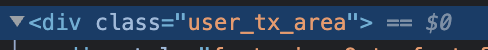

In [11]:
# 리뷰 상세페이지의 HTML 소스 ㅋ코드를 가지고와서 파싱
resp_text = requests.get(url_list[0], headers = { 'User-agent' : 'agent'}) #-> 200
soup_text = bs(resp_text.text, 'html.parser') #-> html 소스코드 파싱 완료
# 리뷰 본문 텍스트 추출
review_text_tag = soup_text.find(name='div', attrs={'class':'user_tx_area'})
review_text = review_text_tag.get_text() #텍스트 부분만 추출 
print(review_text)





탑건: 매버릭

감독
조셉 코신스키
출연
톰 크루즈, 제니퍼 코넬리, 마일즈 텔러
개봉
2022.06.22. 미국
평점






리뷰보기

  이 영화를 2주 전에 봤는데 이래저래 결혼식 준비로 바빠서이제와서 쓰는 [탑건: 매버릭] 후기. 정식 개봉 전 부터 평론단 리뷰가 매우 좋아서 기대를 한껏 했었다.고등학생 때 톰 크루즈 및 다른 헐리우드 배우들을 좋아해서그들의 필모 DVD를 싹 모았었는데80년대 끝자락에 태어난 나로서는80년대 영화가 영 익숙하지가 않았던지라 [탑건, 1986]을 본 적이 없었다.탑건 매버릭을 보러가기 이틀 전에 1986년에 개봉한 탑건을 보았다.탑건을 안봐도 무방하겠지만오프닝부터 대놓고 탑건,1986 오마주 장면들이 많아서제대로 된 탑건 후속편을 감상하고 싶으시다면무조건 탑건을 보고 탑건 매버릭을 감상하시는 것을 강력 추천드린다. 탑건 (1986)은 청춘 영화 그 자체였다.그리고 모두가 동의하겠지만 정말로 톰 크루즈 외모가 미쳤다.80년대 탑건이 유명한 이유가 다름아닌 톰 크루즈의 미모 때문이 아니었나 싶을 정도다.당시 분위기는 어떨지 모르겠으나탑건의 각본은 다른 영화와 비교해 크게 다를 게 없었고80년대 특유의 청춘 영화 분위기가 좋았던 영화다.  동영상[탑건: 매버릭] 메인 예고편하늘에서 펼쳐지는 스펙타클 액션✈톰 크루즈의 항공 액션 블록버스터 '탑건: 매버릭'6월 22일, 극장에서 고공 레이스에 합류하라!#탑건_매버릭 #6...www.youtube.com한국은 6월 22일로 개봉이 미뤄진 대신톰 크루즈와 마일즈 텔러, 그리고 글렌 포웰이 내한 프로모션을 돌기로 하였다고 한다.원래 해외 프로모션이라는 개념이 없었는데이런 개념을 만든 장본인이 바로 톰 크루즈라고 한다.심지어 90년대 당시, 한국은 프로모션 대상 국가가 아니었음에도 불구하고톰 크루즈가 처음으로 영화 프로모션으로 한국에 방문했다고 하니'친절한 톰 아저씨' 닉값 톡톡히 하시는듯.36년 만에 돌아온 탑건 매버릭은 현시대를 잘 반영한 영화다.80년대 인터넷, 컴퓨터도

In [12]:
text_list = [] 
for url in url_list:
    
    resp_text = requests.get(url, headers={'User-agent' : 'agent'})
    soup_text = bs(resp_text.text, 'html.parser') #> html 소스 코드 파싱 완료 
    
    # 본문 텍스트 추출
    review_text_tag = soup_text.find(name ='div', attrs={'class': 'user_tx_area'})
    review_text = review_text_tag.get_text()
    text_list.append(review_text)

    print(review_text[0:200])





탑건: 매버릭

감독
조셉 코신스키
출연
톰 크루즈, 제니퍼 코넬리, 마일즈 텔러
개봉
2022.06.22. 미국
평점






리뷰보기

  이 영화를 2주 전에 봤는데 이래저래 결혼식 준비로 바빠서이제와서 쓰는 [탑건: 매버릭] 후기. 정식 개봉 전 부터 평론단 리뷰가 매우 좋아서 기대를 한껏 했었다.고등학생 때 톰 크루즈 및 다른 헐리우드 배




탑건: 매버릭

감독
조셉 코신스키
출연
톰 크루즈, 제니퍼 코넬리, 마일즈 텔러
개봉
2022.06.22. 미국

리뷰보기

 일단 이 영화는 주관적인 가산점이 들어갈 수밖에 없음을 미리 밝힌다. 왜냐하면 영화가 이미 그렇게 만들어졌기 때문이다. 전편인 탑건을 이미 본 사람들은 대부분 그럴 수밖에 없으니까. 전편과 이어지는 속편이고, 전편에서 부재

톰 크루즈의 탑건2가 제작될까요!?
 
 
 
 
벌써 50이 훌쩍 넘은 나이에도 뭐 산삼으로 깍두기라도 담아드시는건지
카메라 앞에만 서면 펄펄 날아다니다 못해 왠만한 스턴트맨들도
엄두조차 못낼 엄청난 액션을들 모조리 '직접'소화하는것으로 유명한 톰 아저씨!
금일 영화의 홍보차 일곱번째 내한을 한 톰 크루즈는
할리우드 스타들 중에서도 한국사랑(?)이 뛰어




탑건: 매버릭

감독
조셉 코신스키
출연
톰 크루즈, 마일즈 텔러, 제니퍼 코넬리
개봉
2022.06.22. 미국
평점






리뷰보기

 6.25 사변 72주년 되는 오늘 탑건을 보러갔습니다. 전체적인 느낌은 이제 저물어가는 한시대에 대한 아쉬움과 그래도 노병은 살아있다 같은 느낌의...ㅋㅋㅋㅋㅋㅋ 뭐 그런 서글픔과 아련함과 그리고 경외감같은것




탑건: 매버릭

감독
조셉 코신스키
출연
톰 크루즈, 마일즈 텔러, 제니퍼 코넬리
개봉
2022.06.22. 미국
평점






리뷰보기

 정말 오랜만에 리뷰를 남기는 것 같다. 오랜만에 영화를 본 것도 있지만 리뷰를 남겨보고 싶은 영화였기 때문인 듯 하다.처음 탑건의 후속편 제작에 대한 이야기를 들었을 때 '굳이?'라는 생각이 먼저 들었

> 6. 판다스 데이터프레임으로 정리 및 CSV 파일 저장

In [13]:
#딕셔너리 형식으로 항목별 리스트를 원소로 추가
dict_data = {
    'title' : title_list,
    'user' : uid_list,
    'review' : text_list
}
#DF 로 변환
import pandas as pd 
df_data =pd.DataFrame(dict_data)

df_data

,title,user,review
0,탑건: 매버릭 (Top Gun: Maverick) 후기와 비하인드,myte****,"\n\n\n\n탑건: 매버릭\n\n감독\n조셉 코신스키\n출연\n톰 크루즈, 제니퍼..."
1,탑건:매버릭 ( 전투기가 중요한 것이 아니라 파일럿이 중요하다 )-평점8점,reno****,"\n\n\n\n탑건: 매버릭\n\n감독\n조셉 코신스키\n출연\n톰 크루즈, 제니퍼..."
2,톰 크루즈의 탑건2가 제작될까요!?,loan****,\n톰 크루즈의 탑건2가 제작될까요!?\n \n \n \n \n벌써 50이 훌쩍 넘...
3,탑건 매버릭...보고 왔습니다(감상이 자꾸 밀려와서 추가가 자꾸 될거 같습니다),amie****,"\n\n\n\n탑건: 매버릭\n\n감독\n조셉 코신스키\n출연\n톰 크루즈, 마일즈..."
4,[탑건:메버릭] 이제 필요없어 질 수 있는 것들에 대한 위로.,mult****,"\n\n\n\n탑건: 매버릭\n\n감독\n조셉 코신스키\n출연\n톰 크루즈, 마일즈..."
5,[탑건: 매버릭]을 보고,film****,"\n\n\n\n탑건: 매버릭\n\n감독\n조셉 코신스키\n출연\n톰 크루즈, 제니퍼..."
6,탑건: 매버릭,them****,"\n\n\n\n탑건: 매버릭\n\n감독\n조셉 코신스키\n출연\n톰 크루즈, 제니퍼..."
7,[미국 영화] 탑건 : 매버릭,ford****,"\n\n\n탑건: 매버릭\n\n감독\n조셉 코신스키\n출연\n톰 크루즈, 마일즈 텔..."
8,탑건: 매버릭,rome****,"\n영화는 이렇게 만들어야지..쓸데없는 철학도 빼고, 주장도 빼고.간단 명료한 스토..."
9,[영화]탑건: 매버릭-롯데시네마 월드타워 수퍼플렉스 G관 A열 체험,shoy****,"\n\n\n\n탑건: 매버릭\n\n감독\n조셉 코신스키\n출연\n톰 크루즈, 제니퍼..."


In [14]:
#csv파일로 저장
df_data.to_csv('./data/naver_review_topgun.csv')

## part 2. 자연어 처리

1. 네이버 영화 리뷰 데이터셋을 활용하여, 자연어 모델링을 위한 형태소 분석 등 전처리 기법을 학습합니다.

2. 전처리된 자연어 데이터를 벡터화하는 TF-IDF 기법을 이해합니다.

3. 벡터화된 데이터를 활용하여 토픽 모델링과 감성분석 모델링을 실습해봅니다.

> 라이브러리 불러오기

In [15]:
import pandas as pd 
import numpy as np 

import os, re
from tqdm import tqdm 

#경고 문구 미표시
import warnings
warnings.filterwarnings('ignore') #무시 

#한글폰트 지정
import matplotlib.pyplot as plt 
plt.rc('font', family='NanumBarunGothic')

> 네이버 영화 리뷰 데이터 다운 

In [16]:
# 다운 받을 폴더 준비
DATA_DIR = './data'
os.makedirs(DATA_DIR, exist_ok= True)


> #### (로컬에서 실습할 경우) 파이토치 설치: conda install pytorch==1.12.0 -c pytorch 
> #### (로컬에서 실습할 경우) torchtext 설치: conda install -c pytorch torchtext 

In [17]:
import torchtext

In [18]:
torchtext.utils.download_from_url(url='https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt', 
                                  path=os.path.join(DATA_DIR, 'review.txt'))

'./data/review.txt'

In [19]:
data = pd.read_csv('./data/review.txt', sep = '\t') #txt파일 DF 읽어오기
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


> 한글 형태소 분석

> -1) KoNLPy 설치
* https://konlpy.org/ko/latest/install/ 로컬설치

In [20]:
# 긍정 리뷰를 하나 선택
sample_text = data['document'][149978]
print(type(sample_text)) #-> str
print(sample_text)

<class 'str'>
그리 만족스럽진못했어도 7점은 나와야되는것같아 10점줌. 주인공들연기도 훌륭했고 내용도 이정도면 괜찮았다. 해피엔딩으로끝났으면 그저 진부한영화가 되버릴뻔. 그래도 엔딩이 섭섭한건 없지않아있었음. 킬러들의도시도그렇고 콜린파렐을 너무 축축하게 끝내버리는듯


In [21]:
# 트위터 형태소 분석기(Okt)를 활용
from konlpy.utils import pprint
from konlpy.tag import Okt


okt = Okt()
print(okt)

#에러뜨면 이거 참고 https://muten.tistory.com/13 15버전으로 해야됨 

In [22]:
# (단어 ,품사) 추출
tokens = okt.pos(sample_text)
pprint(tokens)

[('그리', 'Verb'),
 ('만족스럽진못', 'Adjective'),
 ('했어도', 'Verb'),
 ('7', 'Number'),
 ('점', 'Noun'),
 ('은', 'Josa'),
 ('나와야', 'Verb'),
 ('되는것', 'Verb'),
 ('같아', 'Adjective'),
 ('10', 'Number'),
 ('점줌', 'Noun'),
 ('.', 'Punctuation'),
 ('주인공', 'Noun'),
 ('들', 'Suffix'),
 ('연', 'Modifier'),
 ('기도', 'Noun'),
 ('훌륭했고', 'Adjective'),
 ('내용', 'Noun'),
 ('도', 'Josa'),
 ('이', 'Determiner'),
 ('정도', 'Noun'),
 ('면', 'Josa'),
 ('괜찮았다', 'Adjective'),
 ('.', 'Punctuation'),
 ('해피엔딩', 'Noun'),
 ('으로', 'Josa'),
 ('끝났으면', 'Verb'),
 ('그저', 'Adverb'),
 ('진부한', 'Adjective'),
 ('영화', 'Noun'),
 ('가', 'Josa'),
 ('되', 'Verb'),
 ('버릴', 'Verb'),
 ('뻔', 'Noun'),
 ('.', 'Punctuation'),
 ('그래도', 'Adverb'),
 ('엔딩', 'Noun'),
 ('이', 'Josa'),
 ('섭섭한건', 'Adjective'),
 ('없지', 'Adjective'),
 ('않아있었음', 'Verb'),
 ('.', 'Punctuation'),
 ('킬러', 'Noun'),
 ('들', 'Suffix'),
 ('의', 'Josa'),
 ('도시', 'Noun'),
 ('도', 'Josa'),
 ('그렇고', 'Adjective'),
 ('콜린파렐', 'Noun'),
 ('을', 'Josa'),
 ('너무', 'Adverb'),
 ('축축하게', 'Adjective'),
 ('끝내', 'No

In [23]:
#단어만 추출  morphs 
tokens = okt.morphs(sample_text)
pprint(tokens)

['그리',
 '만족스럽진못',
 '했어도',
 '7',
 '점',
 '은',
 '나와야',
 '되는것',
 '같아',
 '10',
 '점줌',
 '.',
 '주인공',
 '들',
 '연',
 '기도',
 '훌륭했고',
 '내용',
 '도',
 '이',
 '정도',
 '면',
 '괜찮았다',
 '.',
 '해피엔딩',
 '으로',
 '끝났으면',
 '그저',
 '진부한',
 '영화',
 '가',
 '되',
 '버릴',
 '뻔',
 '.',
 '그래도',
 '엔딩',
 '이',
 '섭섭한건',
 '없지',
 '않아있었음',
 '.',
 '킬러',
 '들',
 '의',
 '도시',
 '도',
 '그렇고',
 '콜린파렐',
 '을',
 '너무',
 '축축하게',
 '끝내',
 '버리는듯']


In [24]:
# 명사만 추출 okt.nouns(data)
tokens = okt.nouns(sample_text)
pprint(tokens)

['점',
 '점줌',
 '주인공',
 '기도',
 '내용',
 '정도',
 '해피엔딩',
 '영화',
 '뻔',
 '엔딩',
 '킬러',
 '도시',
 '콜린파렐',
 '끝내']


> 3.텍스트 전처리

In [25]:
#okt 분석 도구 중 명사를 추출하는 함수를 사용해 각 리뷰문장에서 명사를 토큰화시킴 -> 이 떄, 두 글자 이하의 단어를 분석대상에서 제외

#누락 데이터 제거
review_data = data['document'].dropna().values
type(review_data)#-> 누락제거 및 공백 제거, array

#학습 속도 고려해 1000개 샘플을 선택해 추출
review_data =review_data[:1000]

#배열 크기
print(f"배열 크기 : {review_data.shape}") #-> 1000

#첫번쨰 데이터
print(f"첫번쨰 데이터 : {review_data[1]}")


배열 크기 : (1000,)
첫번쨰 데이터 : 흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나


In [44]:
# 세글자 이상 명사를 사용 (두글자 이하는 제거)
clean_review_data = list()

for review in tqdm(review_data):
    tokens = okt.nouns(review)
    cleaned_tokens = list()
    for word in tokens:
        if len(word) >= 3:
            cleaned_tokens.append(word)
        else:
            pass
    cleaned_review = ' '.join(tokens)
    clean_review_data.append(cleaned_review)
    
print(len(clean_review_data))
print(clean_review_data[0:20]) 

100%|██████████| 1000/1000 [00:01<00:00, 810.79it/s]

1000
['더빙 진짜 목소리', '흠 포스터 보고 초딩 영화 줄 오버 연기', '무재 밓었 다그 래서 추천', '교도소 이야기 구먼 재미 평점 조정', '몬페 의 연기 영화 스파이더맨 커스틴 던스트', '막 걸음 마 세 초등학교 학년 생인 영화 반개 움', '원작 긴장감 제대로', '별 반개 욕 이응경 길용우 생활 년 정말 발 해도 그것 납치 감금 반복 반복 드라마 가족 연기 사람 네', '액션 재미 몇 영화', '왜케 평점 꽤 볼 데 헐리우드', '인피니트 짱 진짜', '볼때 향수 자극 허진호 감성 절제 멜로 달인', '울면 손 횡단보도 때 뻔 이범수 연기', '로만 자꾸 그 사람 것', '취향 존중 다지 진짜 내생 극장 영화 가장 노잼 노 감동 임 스토리 어거지 감동 어거지', '냥 매번 긴장 재밋음', '사람 바스코 이기 락스 코 바비 이기 아이돌 그냥 안달 것', '굿바이 레닌 표절 것 이해 왜 뒤 갈수록 재미', '이건 정말 깨알 캐스팅 질퍽 용구성 버무러진 깨알 일드', '약탈 위 변명 놈 놈 절대 걸']


> 4) TF-IDF 벡터로 표현 

LDA, 로지스틱 회귀 등 머신러닝의 입력값은 수치형태로 표현된 매트릭스입니다. 머신러닝 모델을 활용하기 위해 이 프로젝트에서는 TF-IDF의 형태로 텍스트 문서를 수치화 합니다.

In [27]:
# pip install scikit-learn #사이킷런 설치 

# 사이킷런 패키지 활용 
from sklearn.feature_extraction.text import TfidfVectorizer


# TF-IDF 변환기 객체 생성
tfid = TfidfVectorizer()

# TF-IDF 변환기에 데이터를 입력해 반환 
review_tfid = tfid.fit_transform(clean_review_data)

# 배열 크기
print(review_tfid.shape) #-> 1000, 2040(=단어 사전 ㅋ기) 

# 첫번쨰데이터
print(review_tfid[0])


(1000, 2040)
  (0, 593)	0.6780745999505051
  (0, 1685)	0.3831700242214421
  (0, 403)	0.6272125392880008


In [28]:
# 단어 사전 확인 (딕셔너리 형태)
vocab = tfid.vocabulary_

# 단어 사전 크기
print(len(vocab)) #-> 2040

#단어 사전 출력 (앞에서 5개 단어만 출력)
print(
    {k : v for i, (k, v) in enumerate(vocab.items()) if i < 5} #5개 단어만 출력
) # k : word , v : index


2040
{'더빙': 403, '진짜': 1685, '목소리': 593, '포스터': 1887, '보고': 731}


In [29]:
# 단어들의 사전 인덱스를 이용해 원래 단어 검색하는 매핑 딛ㄱ셔너리
index_to_word = {v:k for k, v in vocab.items()}

print(
    {k : v for i, (k, v) in enumerate(index_to_word.items()) if i < 5}
)  #-> k : index , v : word

{403: '더빙', 1685: '진짜', 593: '목소리', 1887: '포스터', 731: '보고'}


In [30]:
# 첫번쨰 리뷰를 구성하는 단어의 사전 인덱스이용해 원래 단어 복원 (순서 복원 x)

original_text = ' '.join([index_to_word[word_idx] for word_idx in review_tfid[0].indices])

original_text

'목소리 진짜 더빙'

> ### Topic Modeling

문서는 여러 종류의 단어들의 집합체로 구성, 문서를 구성하는 단어들의 확률분포를 활용해 문서의 토픽을 파악할 수 있음!

> #### 1) LDA (LatentDirichletAllocation)**

LDA 토픽 모델링을 이용하여, 문서로부터 두 종류의 토픽을 추출합니다. 문서의 감성(긍정, 부정) 형태로 토픽이 추출되는지, 아니면 다른 종류의 토픽이 추출되는지 분석하세요.

In [31]:
# 사이킷런 패키지 활용
from sklearn.decomposition import LatentDirichletAllocation

# LDA 모델링 객체를 생성 (토픽 갯수를 2로 설정: 긍정/부정)
lda = LatentDirichletAllocation(2)  

# TF-IDF 벡터를 입력하여 모델 학습 
lda.fit(review_tfid)

LatentDirichletAllocation(n_components=2)

In [32]:
# 토픽 모델링 결과를 담고 있는 배열의 형태 : (2개의 토픽, 2157개의 단어)
print(lda.components_.shape) #-> 2개(긍정/부정) 2040개 단어 

(2, 2040)


In [47]:
# 2040개 단어중 토픽 별로 가장 중요도 높은 단어 10개씩 출력

for idx, topic in enumerate(lda.components_):
    print(f"토픽 유형 {idx+1} : ",[(index_to_word[i], topic[i].round(3)) for i in topic.argsort()[:-10:-1]])

토픽 유형 1 :  [('진짜', 19.473), ('정말', 17.733), ('최고', 15.536), ('영화', 15.203), ('연기', 11.863), ('생각', 10.042), ('드라마', 8.987), ('쓰레기', 8.696), ('감독', 8.283)]
토픽 유형 2 :  [('영화', 61.944), ('감동', 14.576), ('평점', 11.635), ('내용', 10.249), ('그냥', 10.249), ('시간', 9.427), ('보고', 9.414), ('완전', 9.176), ('재미', 9.16)]


> #### 1) pyLDAvis 시각화

pyLDAvis 패키지를 활용하여, LDA 토픽 모델링 경과를 시각화 합니다.

In [34]:
# pip install pyldavis 설치
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
visualization = pyLDAvis.sklearn.prepare(lda, review_tfid, tfid)
pyLDAvis.display(visualization)

/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

> ## Sentimental Analysis (감성 분석)

감성 분석은 문장(텍스트)에 드러나는 사람들의 생각이나 느낌, 성향과 같이 주관적인 감성을 분석하는 자연어 처리 기법입니다. 머신러닝 분류 모델을 활용하여 문장이 갖는 긍정 또는 부정의 감성을 예측하세요.

> ### 1. 머신러닝 알고리즘을 활용하여, 긍정/부정 감성을 분류

In [ ]:
labels = data['label'].iloc[:1000].values 
print(labels.shape)
print(labels[:5])

In [ ]:
# 사이킷런 패키지 활용
from sklearn.linear_model import LogisticRegression

# 로지스틱 분류 모델링 객체 생성
lr = LogisticRegression()

lr.fit(review_tfid, labels)

In [ ]:
# 첫 번째 샘플을 이용하여 모델 예측
pred = lr.predict(review_tfid[0])
print(pred)

> ### 2. Part 1에서 수집한 리뷰를 긍정, 부정으로 감성 분류 예측

In [ ]:
# 폴더에 csv 파일 업로드 (./data/naver_review_topgun.csv)

# df로 읽어기
test = pd.read_csv('./data/naver_review_topgun.csv')

test.head()

In [ ]:
# 첫번쨰리뷰 선택
test_sample = test['review'][0]
test_sample

In [ ]:
#한글뺴고 다 제거 
test_sample = re.sub(r"[^가-힣]","", test_sample)
test_sample

In [ ]:
# 세글자 이상의 명사만 가지고 오기
tokens = okt.nouns(test_sample)
cleaned_tokens = list()

for word in tokens:
    if len(word) >= 3:
        cleaned_tokens.append(word)
    else:
        pass
cleaned_review = ' '.join(cleaned_tokens)
        
cleaned_review   

'톰크루즈 제니퍼 이영화 결혼식 고등학생 톰크루즈 헐리우드 오프닝 오마주 제대로 무조건 청춘영화 톰크루즈 톰크루즈 분위기 청춘영화 분위기 동영상 예고편 톰크루즈 블록버스터 레이스 톰크루즈 프로모션 프로모션 장본인 톰크루즈 심지어 프로모션 톰크루즈 프로모션 아저씨 인터넷 컴퓨터 아날로그 디지털 전투기 최첨단 무인전투기 조종사 서시대 이서구 영화사 히어로 영화관 영화관 제니퍼 톰크루즈 그대로 플래쉬 브레이브 소방관 니콜라스홀트 캐스팅 인터뷰 콜사인 아버지 콜사인 오디션 주요한 조종사 조종사 루이스 레인지 아마존 프라임 시리즈 레인지 카우보이 프라임 비디오 프라임 비디오 초자연 미스테리 스릴러 미국드라마 레인지 기종은 톰크루즈 비행기 아저씨 파일럿 자격증 미션임파서블 시리즈 청춘영화 프리퀄 후속작 이현재 이영화'

In [ ]:
# TF-IDF 변환기에 데이터를 입력하여 변환
test_review_tfid = tfid.transform([cleaned_review])

# 배열을 출력
print(test_review_tfid)

  (0, 2038)	0.16508149308901707
  (0, 2022)	0.17491018397675137
  (0, 1970)	0.16508149308901707
  (0, 1785)	0.17491018397675137
  (0, 1782)	0.14130566787318147
  (0, 1576)	0.16508149308901707
  (0, 1427)	0.17491018397675137
  (0, 1392)	0.29655847007446423
  (0, 1244)	0.17491018397675137
  (0, 1237)	0.16508149308901707
  (0, 1234)	0.31621585184993284
  (0, 1090)	0.31621585184993284
  (0, 1074)	0.17491018397675137
  (0, 1008)	0.28261133574636293
  (0, 983)	0.14130566787318147
  (0, 799)	0.17491018397675137
  (0, 790)	0.29655847007446423
  (0, 788)	0.17491018397675137
  (0, 775)	0.31621585184993284
  (0, 640)	0.17491018397675137
  (0, 431)	0.16508149308901707
  (0, 182)	0.15269880700054944


In [ ]:
# 로지스틱 회귀 모델을 활용하여 분류 예측
test_pred = lr.predict(test_review_tfid)[0]
print("분석 결과 {}적인 리뷰로 예측됩니다. ".format("긍정" if test_pred > 0 else "부정")) 

분석 결과 부정적인 리뷰로 예측됩니다. 


# **[추가 과제 예시]**

1. 모델의 예측력을 높이기 위해서, 더 많은 데이터를 모델 학습에 적용해본다. (예제코드에서는 1000개의 데이터를 사용)
2. Hannanum, Mecab 등 다른 종류의 한글 형태소 분석기를 사용해본다.
3. TF-IDF 이외의 다른 종류의 워드 벡터화 기법(word2vec 등)을 적용해본다.
4. LDA 토픽의 갯수를 2개가 아닌 다른 숫자로 적용해본다.
5. 로지스틱 회귀 알고리즘 이외의 머신러닝 분류 알고리즘을 적용해본다.